In [1]:
import pandas as pd
import networkx as nx
from math import exp
import matplotlib.pyplot as plt
import numpy as np
from itertools import count
from mpl_toolkits.basemap import Basemap as Basemap

In [2]:
nodes = pd.read_csv('routes.csv', header=None, names=['i', 'j'])
g = nx.from_pandas_edgelist(nodes, 'i', 'j', create_using=nx.DiGraph())
print('Number of nodes', g.number_of_nodes())
print('Number of edges', g.number_of_edges())

Number of nodes 151
Number of edges 3622


In [3]:
country_status = pd.read_csv('country_status.csv')
country_status.set_index('country', inplace=True)
country_status.sample(n=5)

,t=0,t=1,t=2,t=3,t=4,t=5,t=6,t=7,t=8,t=9,...,t=21,t=22,t=23,t=24,t=25,t=26,t=27,t=28,t=29,t=30
country,,,,,,,,,,,,,,,,,,,,,
Bhutan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Mozambique,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
Croatia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
Cyprus,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
Zimbabwe,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0


In [4]:
infected_ratio = pd.read_csv('infected_ratio.csv')
infected_ratio.set_index('country', inplace=True)
infected_ratio.sample(n=5)

,t=0,t=1,t=2,t=3,t=4,t=5,t=6,t=7,t=8,t=9,...,t=21,t=22,t=23,t=24,t=25,t=26,t=27,t=28,t=29,t=30
country,,,,,,,,,,,,,,,,,,,,,
Niger,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.003492,0.005070,0.005823,0.005147,0.003395,0.001614,0.000532,0.000116,0.000016,0.0
Yemen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.117032,0.154897,0.162026,0.130228,0.077949,0.033541,0.009956,0.001943,0.000235,1.0
Sri Lanka,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.210389,0.189854,0.135635,0.074521,0.030478,0.008940,0.001797,0.000236,0.000019,3.0
Laos,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.052829,0.061006,0.055332,0.038407,0.019807,0.007335,0.001860,0.000310,0.000032,0.0
Mozambique,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.001216,0.001811,0.002072,0.001769,0.001102,0.000490,0.000149,0.000030,0.000004,0.0


In [5]:
coordinates = pd.read_csv('coordinates.csv')
coordinates.set_index('country', inplace=True)
coordinates.sample(n=5)

,lat,lng
country,,
Cote d'Ivoire,8.0,-5.00
Cyprus,35.0,33.00
South Africa,-29.0,24.00
Tanzania,-6.0,35.00
Gabon,-1.0,11.75


In [6]:
period = country_status.shape[1]

In [7]:
for t in range(period):
    nx.set_node_attributes(g, country_status['t='+str(t)].to_dict(), 'status'+str(t))
    nx.set_node_attributes(g, infected_ratio['t='+str(t)].to_dict(), 'infected'+str(t))

In [8]:
nodes = g.nodes() 

groups_status = []
mapping_status = []
colors_status = []

for i in range(int(period/5)+1):
    groups_status.append(set(nx.get_node_attributes(g,'status'+str(i*5)).values()))
    mapping_status.append(dict(zip(sorted(groups_status[i]),count())))
    colors_status.append([mapping_status[i][g.node[n]['status'+str(i*5)]] for n in nodes])
    
# get unique groups
groups = []
mapping = []
colors = []
for i in range(int(period/5)+1):
    groups.append(set(nx.get_node_attributes(g,'infected'+str(i*5)).values()))
    mapping.append(dict(zip(sorted(groups[i]),count())))
    colors.append([mapping[i][g.node[n]['infected'+str(i*5)]] for n in nodes])

In [9]:
m = Basemap(projection='merc',llcrnrlon=-180,llcrnrlat=10,urcrnrlon=-50,
        urcrnrlat=70, lat_ts=0, resolution='l',suppress_ticks=True)
mx, my = m(coordinates['lng'].values, coordinates['lat'].values)
pos = {}
for count, i in enumerate(coordinates.index):
    pos[i] = (mx[count], my[count])

For t = 0


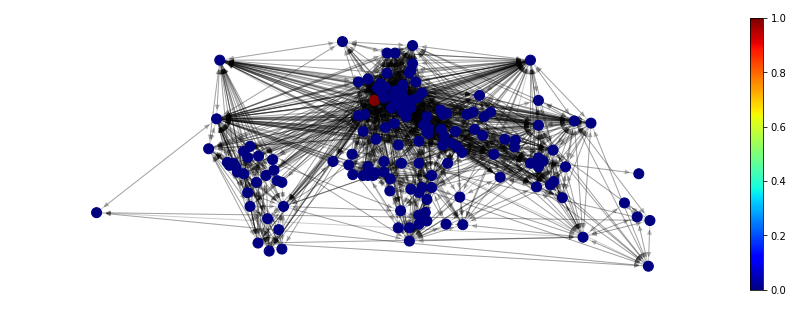

For t = 5


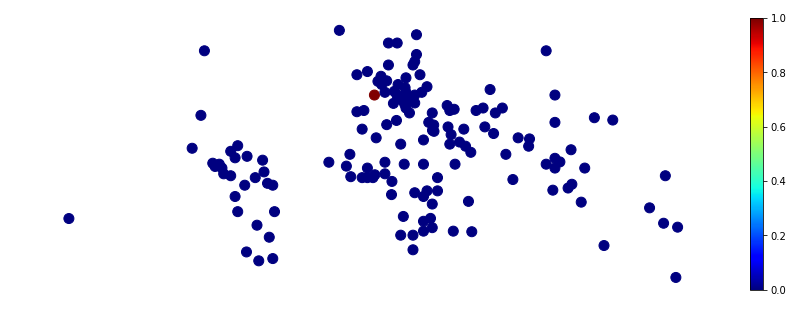

For t = 10


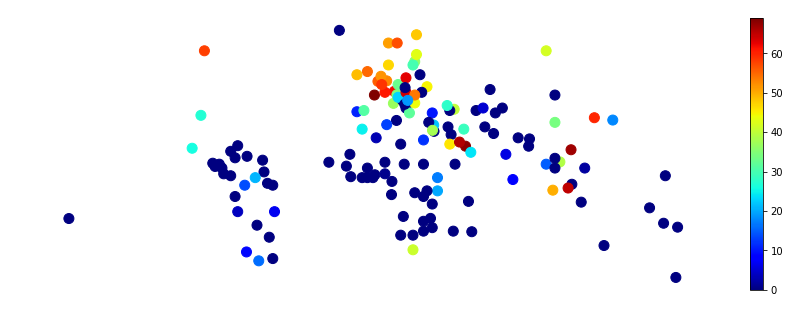

For t = 15


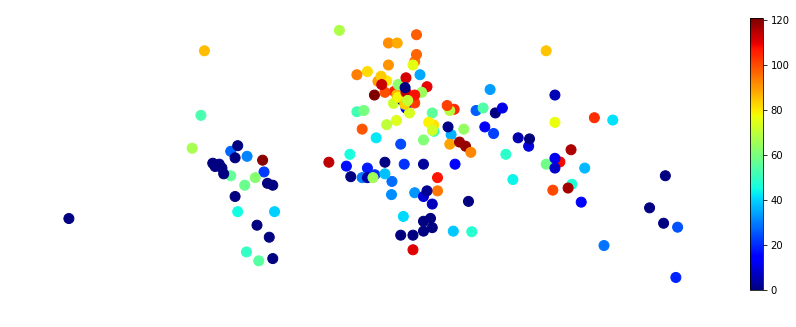

For t = 20


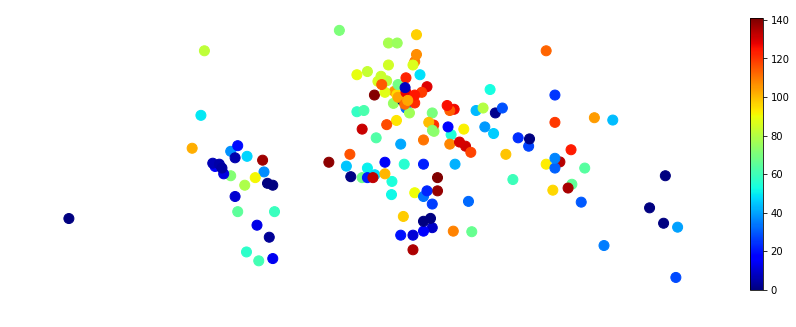

For t = 25


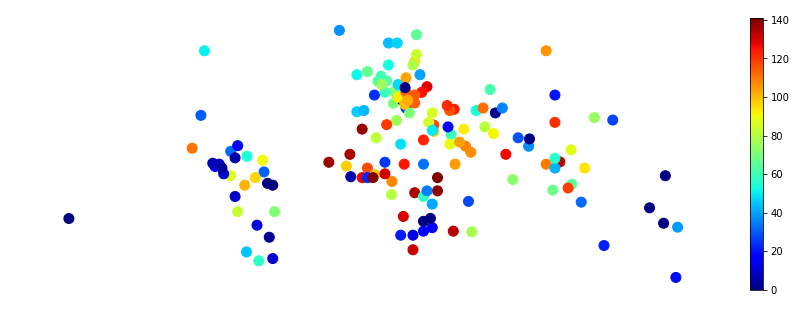

In [10]:
for i in range(int(period/5)):
    print('For t =', i*5)
    plt.figure(figsize = (15,5))
    if i == 0:
        ec = nx.draw_networkx_edges(g, pos, alpha=0.2)
    nc = nx.draw_networkx_nodes(g, pos, nodelist=nodes, node_color=colors[i], 
                            node_size=100, cmap=plt.cm.jet)

    plt.colorbar(nc)
    plt.axis('off')
    plt.show()

For t = 0


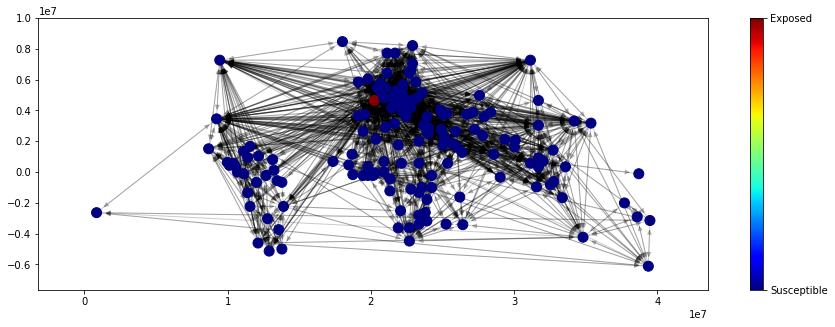

For t = 5


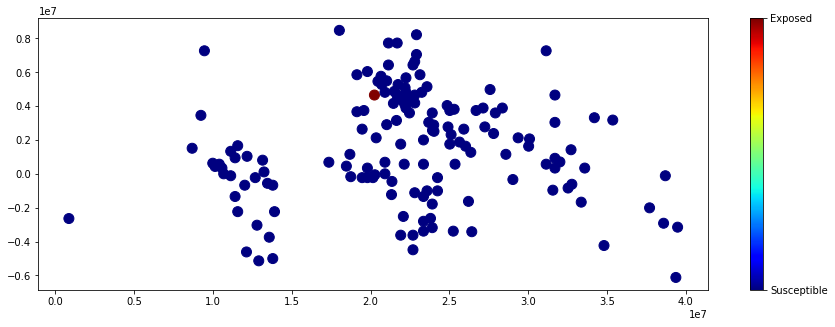

For t = 10


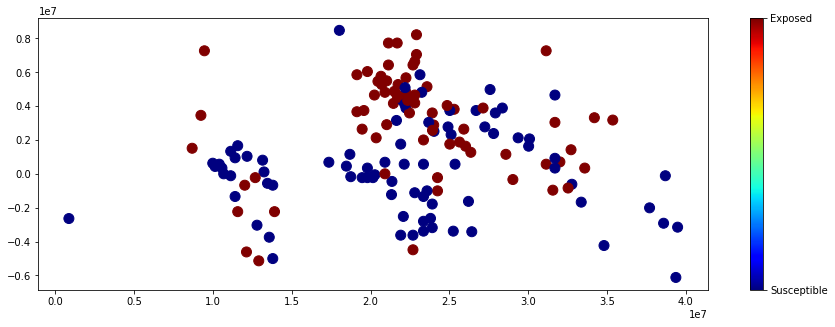

For t = 15


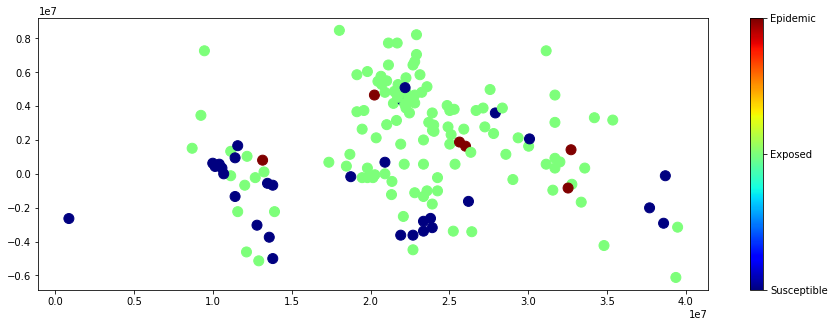

For t = 20


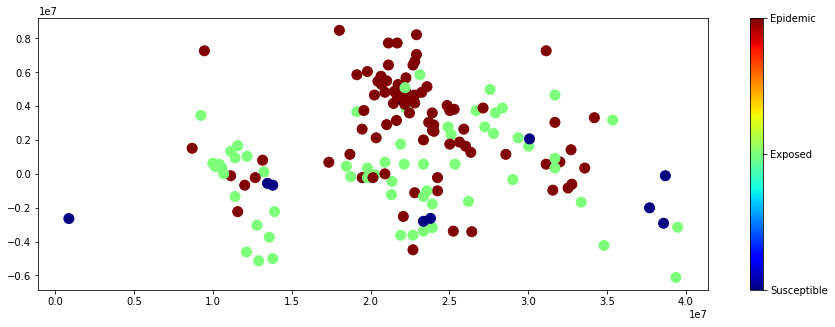

For t = 25


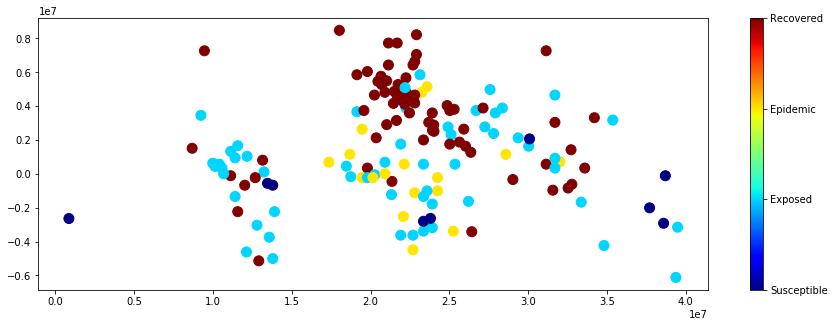

In [11]:
for i in range(int(period/5)):
    print('For t =', i*5)
    fig, ax = plt.subplots(figsize=(15,5))
    #plt.figure(figsize=(20,10))
    if i == 0:
        ec = nx.draw_networkx_edges(g, pos, alpha=0.2)
    nc = nx.draw_networkx_nodes(g, pos, nodelist=nodes, node_color=colors_status[i], 
                            node_size=100, cmap=plt.cm.jet)
    
    cbar = fig.colorbar(nc, ticks=[0, 1, 2, 3])
    cbar.ax.set_yticklabels(['Susceptible', 'Exposed', 'Epidemic', 'Recovered']) 

    #plt.colorbar(nc)
    plt.show()